In [147]:
from gibbs.dataclass import GibbsResult
import matplotlib.pyplot as plt
import numpy as np
from gibbs.learning.klocal_pauli_basis import KLocalPauliBasis
from gibbs.utils import classical_learn_hamiltonian
from gibbs.plots.plots import preparation, preparation_error,preparation_vsclassic,compare_preparations
%load_ext autoreload
%autoreload 2
import os
gibbs_result_list = []
folder_path = "../saved_simulations/turbo/YYtermsheisenberg"
for file in os.listdir(folder_path):
    if file.endswith(".npy"):
        path = os.path.join(folder_path, file)
        gibbs_result_list.append(GibbsResult.load(path))
gibbs_result_list = gibbs_result_list[::-1]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
cfields = [r.coriginal-gibbs_result_list[0].coriginal for r in gibbs_result_list]
YYcoefs = [cfield[cfield!=0] for cfield in cfields]
YYcoefs = np.array([np.real(c[0]) if len(c)!=0 else 0 for c in YYcoefs]) +0.25
compare_preparations(gibbs_result_list,[f"YY:{i}" for i in YYcoefs]).show()

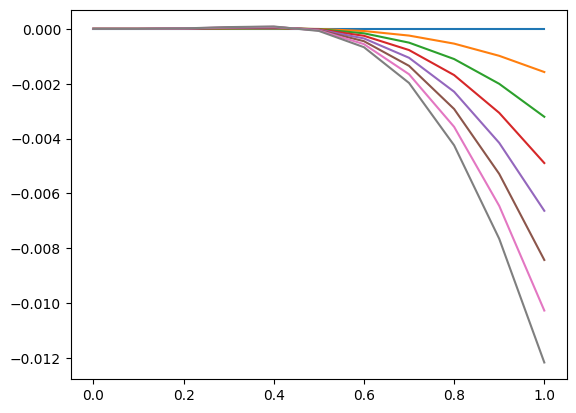

In [146]:
# YYterms = lambda i : list(zip(*[(g.cfaulties[i][g.basis.pauli_to_num("YYII"):g.basis.pauli_to_num("IIYY")+1],g.betas[i]) for g in gibbs_result_list]))

YYterms = lambda t,j : np.array([np.real(g.cfaulties[t][g.basis.pauli_to_num("YYII"):g.basis.pauli_to_num("IIYY")+1])[j] for g in gibbs_result_list])
betas = gibbs_result_list[0].betas
time_evol = np.array([YYterms(t,0)-YYterms(t,0)[0] for t,_ in enumerate(betas)])
# print(first_term)
plt.plot(betas,time_evol);
# plt.show()
